In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import torch
torch.cuda.set_device(1)

x=torch.Tensor(5,3)
print(x.cuda())

tensor([[ 3.9236e-44,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -5.7419e-22,  3.0887e-41],
        [ 2.3822e-44,  0.0000e+00,  2.3822e-44],
        [ 0.0000e+00,  1.4013e-45,  0.0000e+00],
        [-5.7419e-22,  3.0887e-41,  6.3058e-44]], device='cuda:1')


In [3]:
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from scipy.misc import toimage
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import PIL
import sys
import seaborn as sns
import sklearn.metrics
import pickle

In [6]:
print(torch.__version__)

1.1.0a0+828a6a3


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Exploring the CIFAR-10 dataset

In [7]:
metaDataPath = '../dataset/cifar-10-batches-py/batches.meta'
metaData = unpickle(metaDataPath)
label_names_bin = 'label_names'.encode('utf-8')
labelNames = metaData[label_names_bin]
labelNames = [x.decode() for x in labelNames]
labelNames

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## Control Flags

In [8]:
data_aug = True 

## Easier way to load data using torch

In [9]:
data_aug_transforms = []

if data_aug == True:

    data_aug_transforms = [
        transforms.RandomCrop((32,32), padding=4),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomRotation(15),
#         transforms.RandomAffine(degrees=0, translate=(.3,.7)),
#         transforms.ColorJitter(
#                 brightness=float(0.1*np.random.rand(1)),
#                 contrast=float(0.1*np.random.rand(1)),
#                 saturation=float(0.1*np.random.rand(1)),
#                 hue=float(0.1*np.random.rand(1))),
#         
#         transforms.Resize((224,224)),
        transforms.ColorJitter(hue=.25, saturation=.25),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        transforms.RandomGrayscale(p=0.1)
                    ]

In [10]:
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])

In [13]:
# cifar_dataset = torchvision.datasets.CIFAR10(root='dataset/',
#                                            train=True,
#                                            transform=norm_transform,
#                                            download=False)

# test_dataset = torchvision.datasets.CIFAR10(root='dataset/',
#                                           train=False,
#                                           transform=test_transform)

In [14]:
cifar_dataset = torchvision.datasets.CIFAR10(root='../dataset/',
                                           train=True,
                                           transform=norm_transform,
                                           download=False)

test_dataset = torchvision.datasets.CIFAR10(root='../dataset/',
                                          train=False,
                                          transform=test_transform)

In [15]:
cifar_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ../dataset/
    Transforms (if any): Compose(
                             RandomCrop(size=(32, 32), padding=4)
                             ColorJitter(brightness=0, contrast=0, saturation=0.25, hue=0.25)
                             RandomHorizontalFlip(p=0.5)
                             RandomRotation(degrees=(-20, 20), resample=2, expand=False)
                             RandomGrayscale(p=0.1)
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

In [16]:
test_dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: ../dataset/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

Image in the train dataset has shape: torch.Size([3, 32, 32])
Label corresponding to image is: 9
Label  9 is: truck


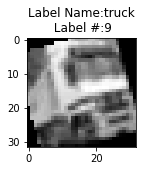

In [17]:
exampleNumber = 1
img = cifar_dataset[exampleNumber][0]
num = cifar_dataset[exampleNumber][1]
# name = cifar_dataset.classes[num]
name = labelNames[num]

print('Image in the train dataset has shape:',img.size())
print('Label corresponding to image is:',num)
print('Label ',num,'is:',name)

img = np.rollaxis(np.array(img),0,3)

plt.figure(figsize=(2,2))
plt.title('Label Name:'+ name+ '\n Label #:'+str(num))
plt.imshow(toimage(img))
plt.show()

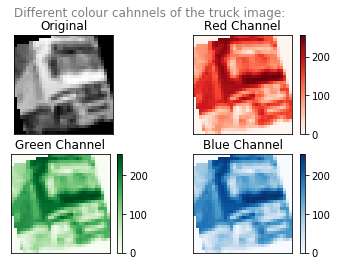

In [18]:
b,g,r = cv2.split(img)
r = toimage(r)
g=toimage(g)
b = toimage(b)

fig, axs = plt.subplots(2,2)

cax_00 = axs[0,0].imshow(toimage(img))
axs[0,0].set_title('Original')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

cax_01 = axs[0,1].imshow(r, cmap='Reds')
axs[0,1].set_title('Red Channel')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
fig.colorbar(cax_01, ax=axs[0,1])

cax_10 = axs[1,0].imshow(g, cmap='Greens')
axs[1,0].set_title('Green Channel')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
fig.colorbar(cax_10, ax=axs[1,0])

cax_11 = axs[1,1].imshow(b, cmap='Blues')
axs[1,1].set_title('Blue Channel')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
fig.colorbar(cax_11, ax=axs[1,1])

plt.suptitle('Different colour cahnnels of the '+ name+ ' image:', color ='gray')
plt.show()

In [19]:
r = np.array(r).flatten()
g = np.array(g).flatten()
b = np.array(b).flatten()

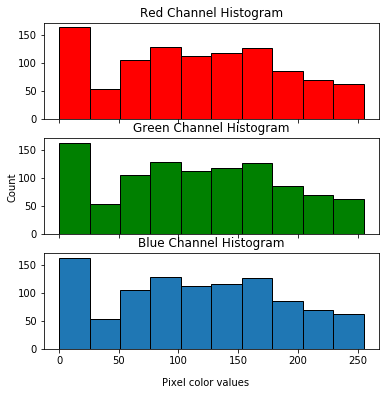

In [20]:
# Plot histograms
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(6,6))
fig.text(0.5, 0.04, 'Pixel color values', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

axs[0].hist(r, bins=10, color='red', ec='black')
axs[0].set_title('Red Channel Histogram')
axs[1].hist(g.ravel(), bins=10, color='green', ec='black')
axs[1].set_title('Green Channel Histogram')
axs[2].hist(b.ravel(), bins=10, ec='black')
axs[2].set_title('Blue Channel Histogram')

plt.show()

## Visualizing all class members

In [21]:
def classMembers(dataset, numMembersOfEachClass = 2):
    
    imagesOfEachClass = {}
    
    for label in range(10):
        imagesOfEachClass[label] = []
        for i in range(numMembersOfEachClass):
            rand = random.randint(0, len(dataset))
            while dataset[rand][1] != label:
                rand = random.randint(0, len(dataset))
            img = dataset[rand][0]
            imagesOfEachClass[label].append(img)
    return imagesOfEachClass

def visualizeClassMembers(imagesOfEachClass, datasetLabelNames):
    rows = len(imagesOfEachClass)
    cols = len(imagesOfEachClass[1])
    
    fig, axs = plt.subplots(figsize=(32.0, 32.0), nrows=rows, ncols=cols)
#     gs1 = gridspec.GridSpec(4, 4)
#     gs1.update(wspace=0.005, hspace=0.005) # set the spacing between axes.
    
    for r in range(rows):
        for c in range(cols):
            img = imagesOfEachClass[r][c-1]
            img = np.rollaxis(np.array(img),0,3)
            col = axs[r,c]
            col.imshow(toimage(img))
            col.set_title(datasetLabelNames[r])
            
    plt.subplots_adjust(wspace=0, hspace=0)
    fig.tight_layout()
    plt.show()
    
    return None

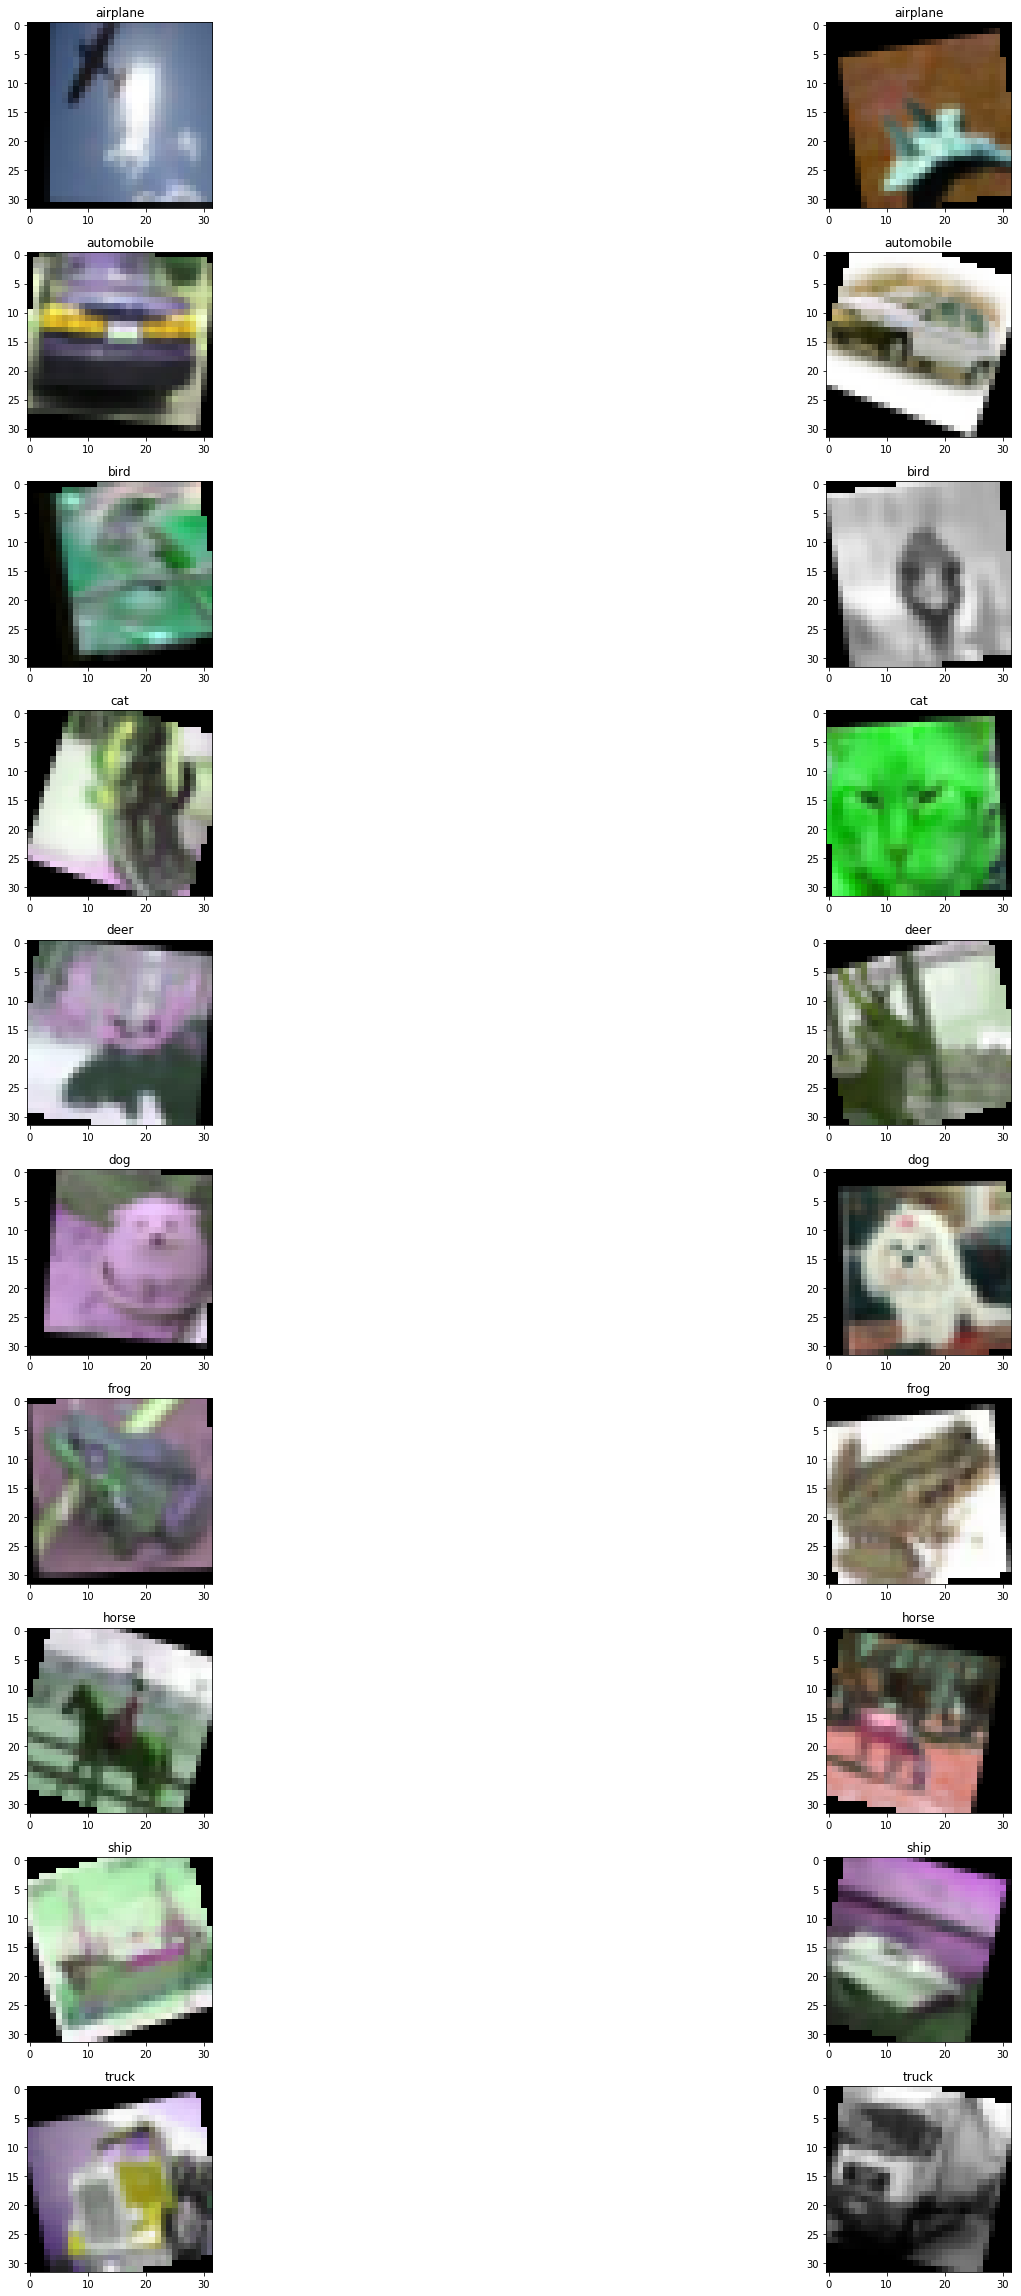

In [22]:
imagesOfEachClass = classMembers(cifar_dataset)
# visualizeClassMembers(imagesOfEachClass, cifar_dataset.classes)
visualizeClassMembers(imagesOfEachClass, labelNames)

## Visualize Augmented data

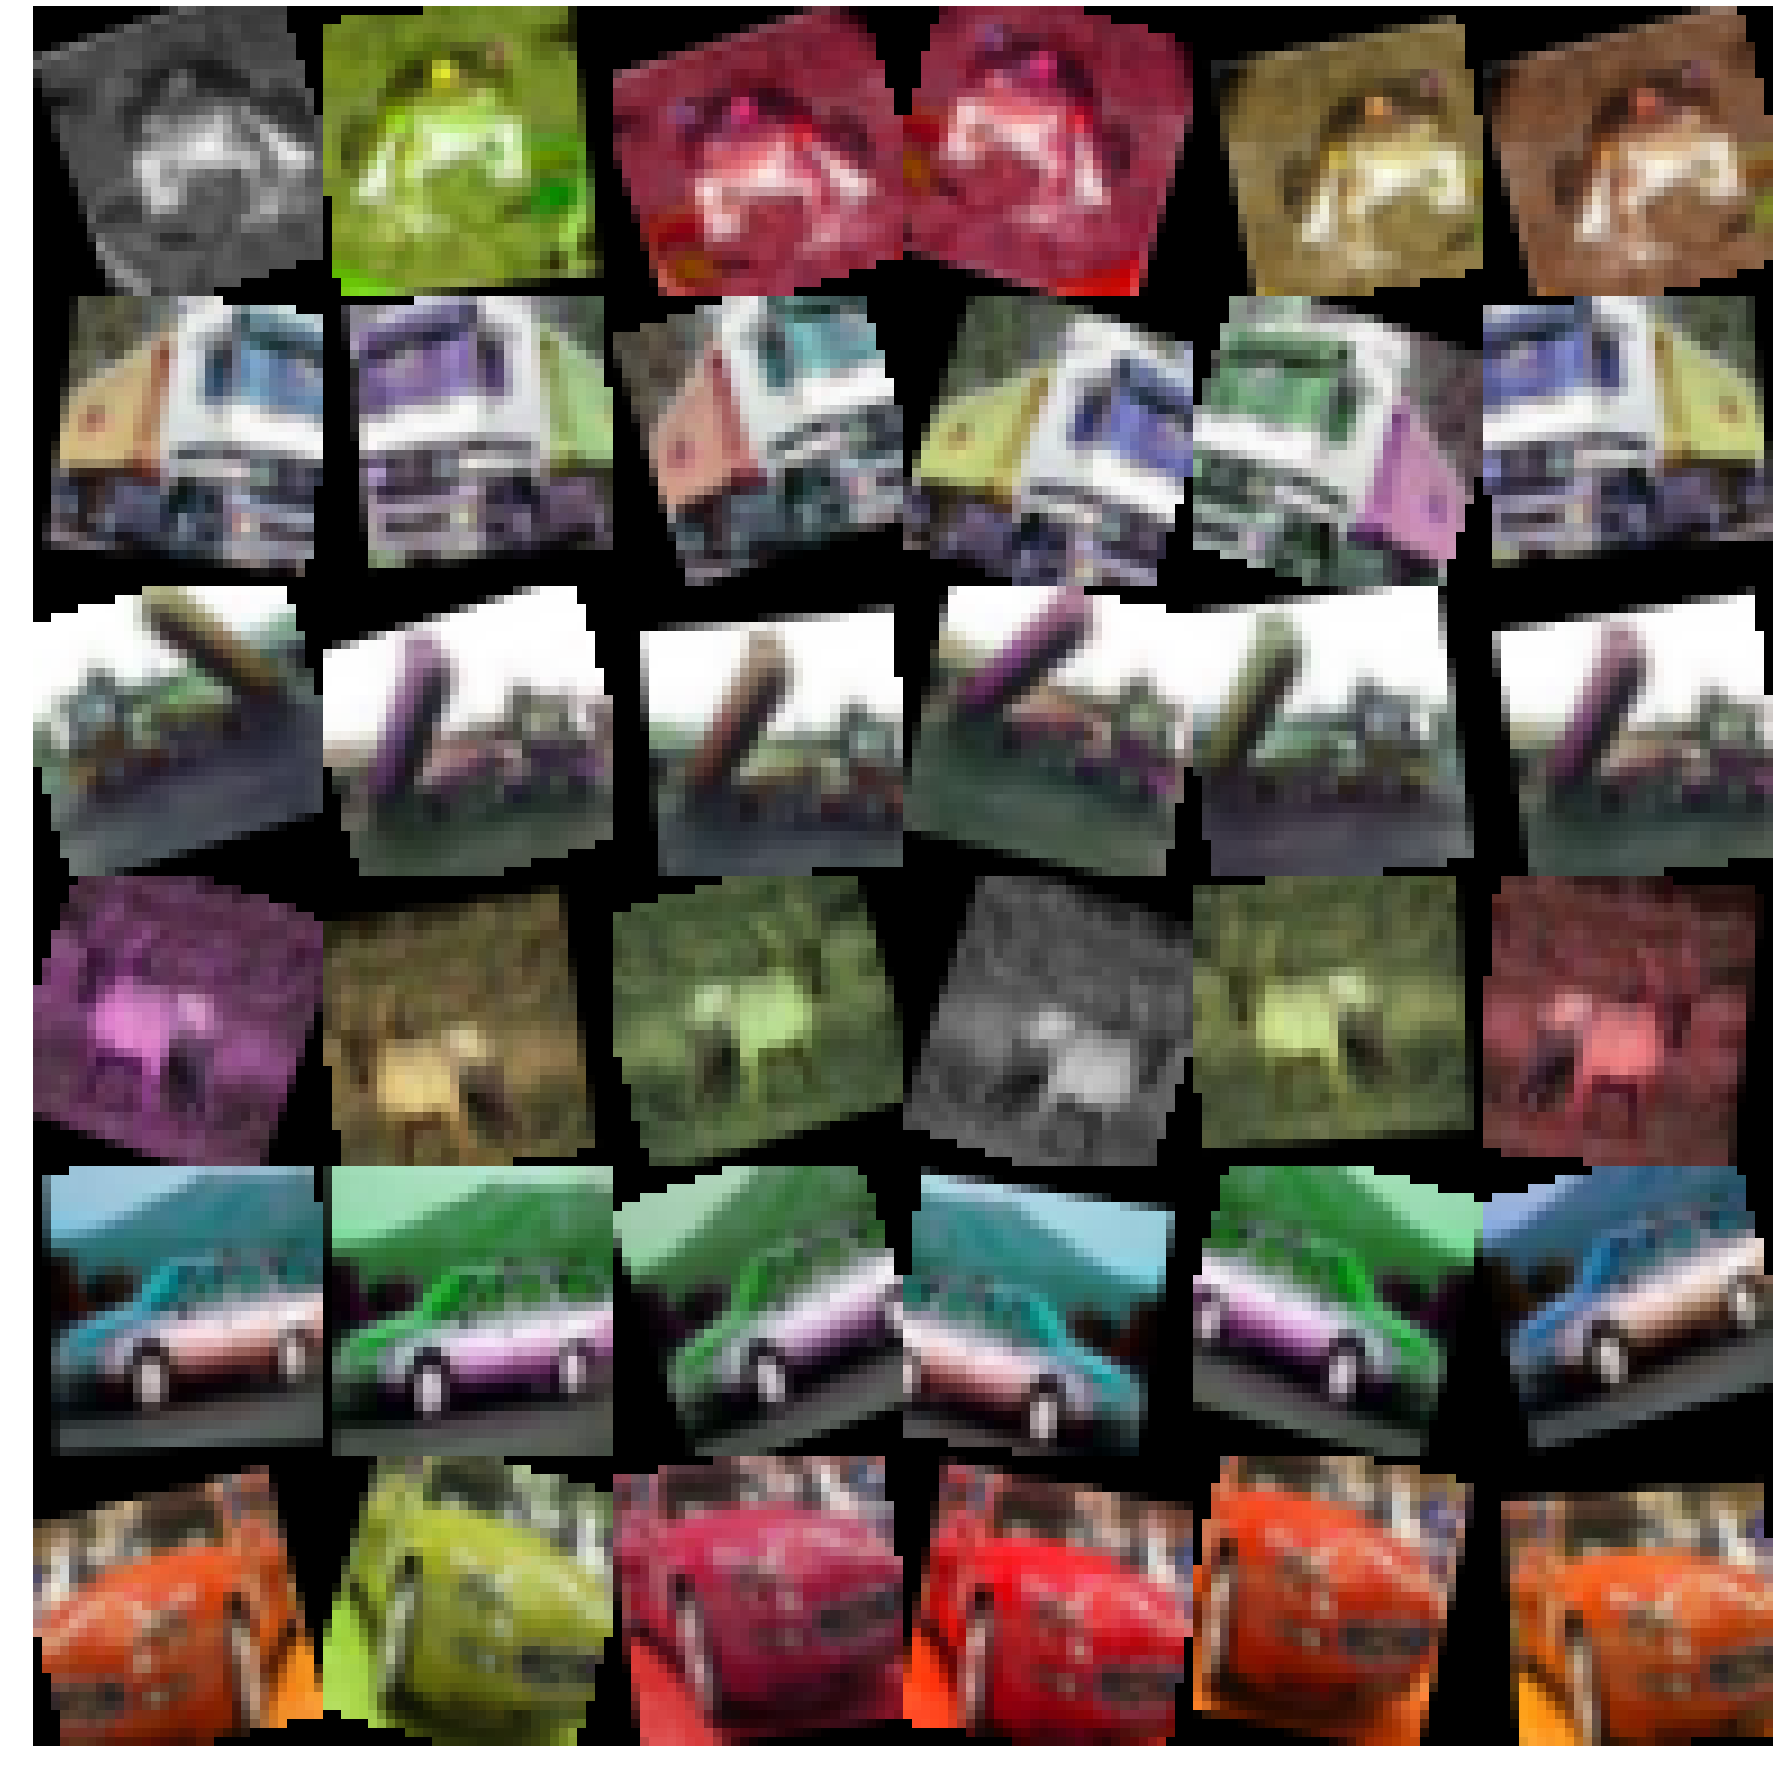

In [23]:
def show_dataset(dataset, n=6):
    img = np.vstack((np.hstack((np.asarray(np.rollaxis(np.array(dataset[i][0]),0,3)) for _ in range(n))) 
                     for i in range(n)))
    fig, axs = plt.subplots(1, figsize=(32,32))
    axs.imshow(toimage(img))
    plt.axis('off')

show_dataset(cifar_dataset)

## Visualizing distribution of different classes

In [24]:
def getLabels(dataset):
    labels = []
    for i in range(len(dataset)):
        labels.append(dataset[i][1])
    return labels

trainLabels = getLabels(cifar_dataset)
testLabels = getLabels(test_dataset)

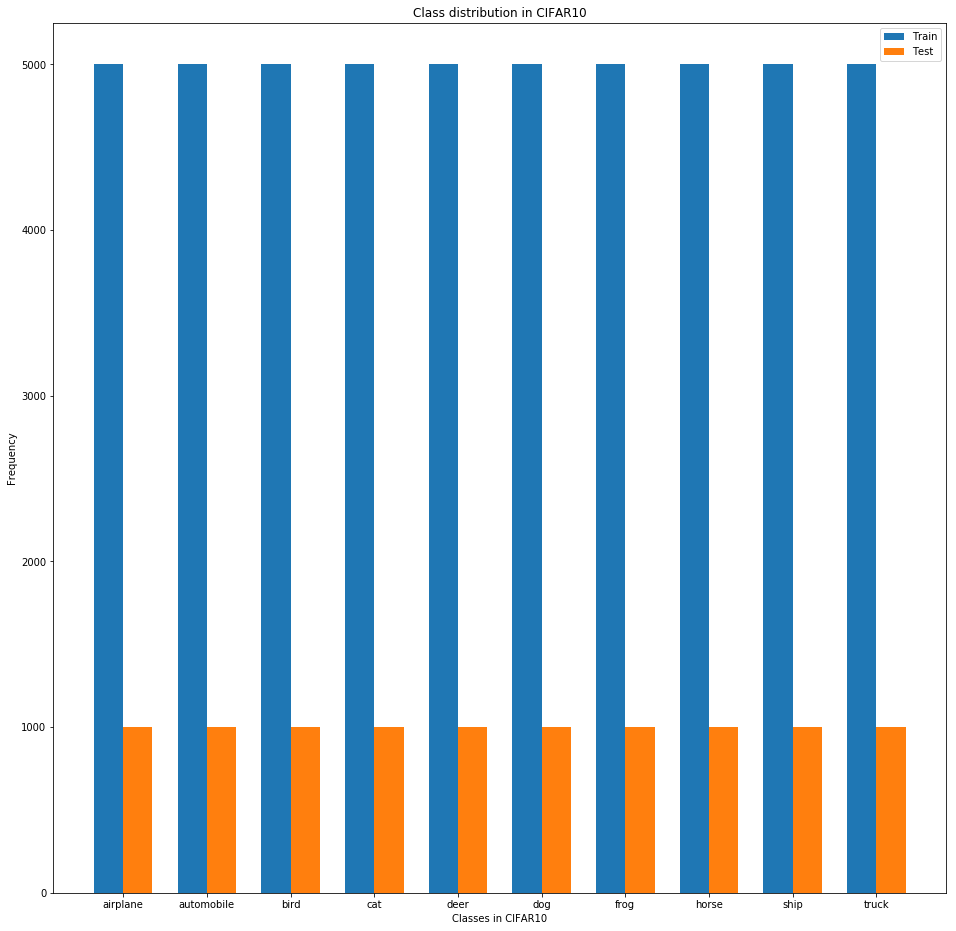

In [25]:
# trainLabels = cifar_dataset.targets
# testLabels = test_dataset.targets

uniqueValuesTrain, occurCountTrain = np.unique(trainLabels, return_counts=True)
uniqueValuesTest, occurCountTest = np.unique(testLabels, return_counts=True)

ind = np.arange(len(occurCountTrain))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,16))
rects1 = ax.bar(ind - width/2, occurCountTrain, width, 
                label='Train')
rects2 = ax.bar(ind + width/2, occurCountTest, width,
                label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_xlabel('Classes in CIFAR10')
ax.set_title('Class distribution in CIFAR10')
ax.set_xticks(ind)
ax.set_xticklabels(labelNames)
ax.legend()
fig.show()

In [25]:
def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cuda


In [27]:
input_size = 32 * 32 * 3
listOfHiddenSizes = [[50], [50, 40], [50, 40, 30], [50, 40, 30, 25], [50, 40, 30, 25, 20]]
num_classes = 10
num_epochs = 50
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
train = True

In [28]:
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

In [29]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [30]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes):
        super(MultiLayerPerceptron, self).__init__()
    
        layers = []
        
        layers.append(nn.Linear(input_size, hidden_layers[0]))
        layers.append( nn.ReLU() )

        for i in range(1, len(hidden_layers)):
            
            layers.append( nn.Linear(hidden_layers[i-1], hidden_layers[i]) )
            layers.append( nn.ReLU() )
        
        layers.append( nn.Linear(hidden_layers[-1], num_classes) )
        
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        
        for i in range(len(self.layers)):
            x = self.layers[i](x)

        out = x
        return out

In [31]:
def run_training(model, train_loader, learning_rate, learning_rate_decay, num_epochs, early_stopping=True):
    
    model.apply(weights_init)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

    # Train the model
    lr = learning_rate
    total_step = len(train_loader)
    
    valAcc = []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # Move tensors to the configured device
            images = images.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            outputs = model(images.reshape(batch_size,-1))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Code to update the lr
        lr *= learning_rate_decay
        update_lr(optimizer, lr)
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                predicted = model(images.reshape(batch_size,-1))
                _ , predicted = torch.max(predicted, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            
            acc = 100*correct/total
            valAcc.append(acc)
            print('Validataion accuracy is: {} %'.format(acc))
            
            if early_stopping:
                if acc >= np.amax(valAcc):
                    torch.save(model.state_dict(), 'DNN_models/ES/model'+str(epoch+1)+'.ckpt')
                    
    best_id = np.argmax(valAcc)
#     model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)
    model.load_state_dict(torch.load('DNN_models/ES/model'+str(best_id+1)+'.ckpt'))
    
    return valAcc

In [76]:
def run_testing(model, test_loader):

    # Test the model
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images.reshape(batch_size,-1))
            _ , predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        testAcc = 100 * correct / total
        print('Accuracy of the network on the {} test images: {} %'.format(total, testAcc))
        
        return testAcc

In [33]:
def trainMultipleHiddenSizes(listOfHiddenSizes, visualizeES = False, visualizeLayers = False, train = False):
    
    bestESModelValAcc = []
    allValAccs = []
    for hid in range(len(listOfHiddenSizes)):
        print('#################################################')
        print('Training Model ', hid)

        hidden_size = listOfHiddenSizes[hid]

        model = MultiLayerPerceptron(input_size, hidden_size, num_classes).to(device)
        print(model)

        if train:
            valAcc = run_training(model, train_loader, learning_rate, learning_rate_decay, num_epochs)
            allValAccs.append(valAcc)
            bestESModelValAcc.append(np.max(np.array(valAcc)))
            
            # Save the model checkpoint
            torch.save(model.state_dict(), 'DNN_models/DNN_model'+str(hid)+'.ckpt')
    
    bestModel_ID = np.argmax(np.array(bestESModelValAcc))
    
    if visualizeES:
        valAcc = allValAccs[bestModel_ID]
        epochs = [int(i) for i in range(1, num_epochs+1)]
        ax = plt.figure().gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.plot(epochs,valAcc)
        plt.xlabel('number of epochs')
        plt.ylabel('validation accuracy')
        plt.show()
        
    if visualizeLayers:
        x=[i for i in range(1, len(listOfHiddenSizes)+1)]
        ax = plt.figure().gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.bar(x, bestESModelValAcc)
        plt.xlabel('Layers')
        plt.ylabel('Validation Accuracy')
        plt.show()
        
    return bestModel_ID

In [77]:
def testMultipleParamVals(paramVals, train=False, visualizeTestAcc = False):
    
    testAcc = []
    for hid in range(len(paramVals)):
        hidden_size = paramVals[hid]

        model = MultiLayerPerceptron(input_size, hidden_size, num_classes).to(device)
        if not train:
            # Run the test code once you have your by setting train flag to false
            # and loading the best model

            best_model = torch.load('DNN_models/DNN_model'+str(hid)+'.ckpt')
            model.load_state_dict(best_model)

            testAcc.append(run_testing(model, test_loader))
    
    if visualizeTestAcc:
        x=[i for i in range(1, len(paramVals)+1)]
        ax = plt.figure().gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.bar(x, testAcc)
        plt.xlabel('Models')
        plt.ylabel('Test accuracy')
        plt.show()
    

#################################################
Training Model  0
MultiLayerPerceptron(
  (layers): Sequential(
    (0): Linear(in_features=3072, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)
Epoch [1/50], Step [100/245], Loss: 2.0545
Epoch [1/50], Step [200/245], Loss: 1.9779
Validataion accuracy is: 29.7 %
Epoch [2/50], Step [100/245], Loss: 1.9543
Epoch [2/50], Step [200/245], Loss: 1.8570
Validataion accuracy is: 32.7 %
Epoch [3/50], Step [100/245], Loss: 1.8833
Epoch [3/50], Step [200/245], Loss: 1.8656
Validataion accuracy is: 35.8 %
Epoch [4/50], Step [100/245], Loss: 1.7972
Epoch [4/50], Step [200/245], Loss: 1.7086
Validataion accuracy is: 34.0 %
Epoch [5/50], Step [100/245], Loss: 1.8248
Epoch [5/50], Step [200/245], Loss: 1.7759
Validataion accuracy is: 36.3 %
Epoch [6/50], Step [100/245], Loss: 1.7678
Epoch [6/50], Step [200/245], Loss: 1.8561
Validataion accuracy is: 36.8 %
Epoch [7/50], Step [100/245], Loss

Validataion accuracy is: 39.7 %
Epoch [15/50], Step [100/245], Loss: 1.6462
Epoch [15/50], Step [200/245], Loss: 1.5765
Validataion accuracy is: 40.7 %
Epoch [16/50], Step [100/245], Loss: 1.6976
Epoch [16/50], Step [200/245], Loss: 1.6861
Validataion accuracy is: 41.8 %
Epoch [17/50], Step [100/245], Loss: 1.5358
Epoch [17/50], Step [200/245], Loss: 1.6997
Validataion accuracy is: 39.0 %
Epoch [18/50], Step [100/245], Loss: 1.6963
Epoch [18/50], Step [200/245], Loss: 1.7956
Validataion accuracy is: 41.1 %
Epoch [19/50], Step [100/245], Loss: 1.7116
Epoch [19/50], Step [200/245], Loss: 1.6435
Validataion accuracy is: 41.2 %
Epoch [20/50], Step [100/245], Loss: 1.7658
Epoch [20/50], Step [200/245], Loss: 1.5946
Validataion accuracy is: 40.0 %
Epoch [21/50], Step [100/245], Loss: 1.6505
Epoch [21/50], Step [200/245], Loss: 1.6457
Validataion accuracy is: 40.6 %
Epoch [22/50], Step [100/245], Loss: 1.5902
Epoch [22/50], Step [200/245], Loss: 1.6025
Validataion accuracy is: 41.9 %
Epoch [2

Epoch [30/50], Step [100/245], Loss: 2.3024
Epoch [30/50], Step [200/245], Loss: 2.3028
Validataion accuracy is: 7.9 %
Epoch [31/50], Step [100/245], Loss: 2.3027
Epoch [31/50], Step [200/245], Loss: 2.3030
Validataion accuracy is: 7.9 %
Epoch [32/50], Step [100/245], Loss: 2.3026
Epoch [32/50], Step [200/245], Loss: 2.3028
Validataion accuracy is: 7.8 %
Epoch [33/50], Step [100/245], Loss: 2.3025
Epoch [33/50], Step [200/245], Loss: 2.3027
Validataion accuracy is: 7.8 %
Epoch [34/50], Step [100/245], Loss: 2.3027
Epoch [34/50], Step [200/245], Loss: 2.3030
Validataion accuracy is: 7.8 %
Epoch [35/50], Step [100/245], Loss: 2.3023
Epoch [35/50], Step [200/245], Loss: 2.3032
Validataion accuracy is: 7.8 %
Epoch [36/50], Step [100/245], Loss: 2.3024
Epoch [36/50], Step [200/245], Loss: 2.3027
Validataion accuracy is: 7.8 %
Epoch [37/50], Step [100/245], Loss: 2.3028
Epoch [37/50], Step [200/245], Loss: 2.3025
Validataion accuracy is: 7.9 %
Epoch [38/50], Step [100/245], Loss: 2.3026
Epoc

Epoch [45/50], Step [100/245], Loss: 2.3026
Epoch [45/50], Step [200/245], Loss: 2.3024
Validataion accuracy is: 7.8 %
Epoch [46/50], Step [100/245], Loss: 2.3027
Epoch [46/50], Step [200/245], Loss: 2.3023
Validataion accuracy is: 7.8 %
Epoch [47/50], Step [100/245], Loss: 2.3021
Epoch [47/50], Step [200/245], Loss: 2.3027
Validataion accuracy is: 7.8 %
Epoch [48/50], Step [100/245], Loss: 2.3024
Epoch [48/50], Step [200/245], Loss: 2.3023
Validataion accuracy is: 7.8 %
Epoch [49/50], Step [100/245], Loss: 2.3025
Epoch [49/50], Step [200/245], Loss: 2.3028
Validataion accuracy is: 7.8 %
Epoch [50/50], Step [100/245], Loss: 2.3028
Epoch [50/50], Step [200/245], Loss: 2.3023
Validataion accuracy is: 7.8 %
#################################################
Training Model  4
MultiLayerPerceptron(
  (layers): Sequential(
    (0): Linear(in_features=3072, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in

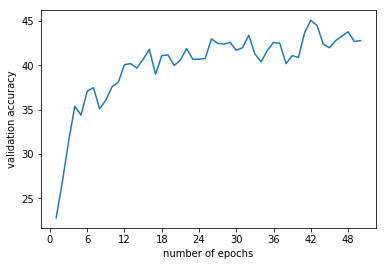

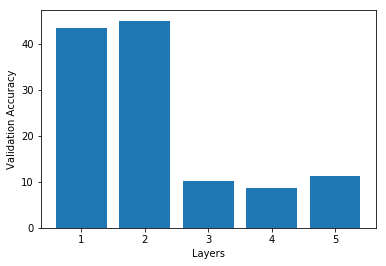

In [35]:
listOfHiddenSizes = [[50], [50, 40], [50, 40, 30], [50, 40, 30, 25], [50, 40, 30, 25, 20]]
train = True
bestModel_ID = trainMultipleHiddenSizes(listOfHiddenSizes, visualizeES = True, visualizeLayers = True, train= train)

In [78]:
train = False 

Accuracy of the network on the 10000 test images: 40.48 %
Accuracy of the network on the 10000 test images: 42.52 %
Accuracy of the network on the 10000 test images: 10.0 %
Accuracy of the network on the 10000 test images: 10.0 %
Accuracy of the network on the 10000 test images: 10.0 %


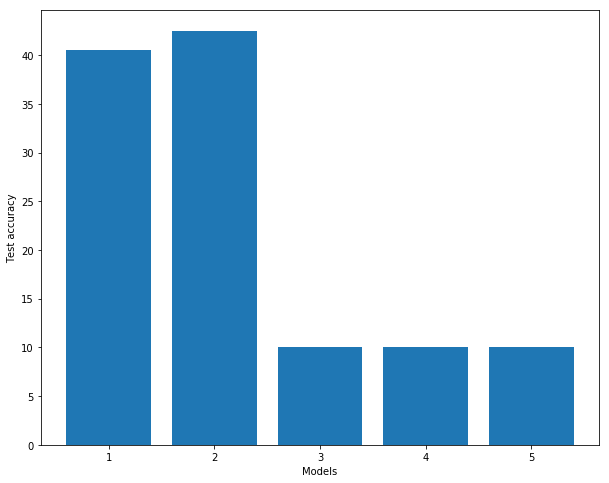

In [79]:
testMultipleParamVals(listOfHiddenSizes, train=train, visualizeTestAcc = True)

In [80]:
# !pip install seaborn

In [99]:
def display_classification_results(y_test, y_pred,title="Accuracy Heatmap",show_report=True):
    print("Test accuracy: %.2f%%"%(sklearn.metrics.accuracy_score(y_test, y_pred)*100))
    if show_report:
        print("Classification Report:\n",sklearn.metrics.classification_report(y_test, y_pred))
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    conf_mat = sklearn.metrics.confusion_matrix(y_test,y_pred)
    print("Confusion Matrix:\n",conf_mat)
    ax = sns.heatmap(conf_mat);
    ax.set(title=title, xlabel="CIFAR10 Classes", ylabel="CIFAR10 Classes")

In [103]:
pickle.dump( bestModel_ID, open( "DNN_models/bestModelID.p", "wb" ) )
bestModel_ID = pickle.load( open( "DNN_models/bestModelID.p", "rb" ) )

In [94]:
bestmodel = MultiLayerPerceptron(input_size, listOfHiddenSizes[bestModel_ID], num_classes).to(device)
bestmodel.load_state_dict(torch.load('DNN_models/DNN_model'+str(bestModel_ID)+'.ckpt'))

In [95]:
def run_testing_labels(model, test_loader):

    # Test the model
    with torch.no_grad():
        correct = 0
        total = 0
        allPredLabels = []
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images.reshape(batch_size,-1))
            _ , predicted = torch.max(outputs, 1)
            allPredLabels.append(predicted)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        testAcc = 100 * correct / total
        print('Accuracy of the network on the {} test images: {} %'.format(total, testAcc))
        
        return testAcc, allPredLabels

In [96]:
testLabels = getLabels(test_dataset)
_, bestModelPreds = run_testing_labels(bestmodel, test_loader)

Accuracy of the network on the 10000 test images: 42.52 %


In [97]:
bestModelPreds = [i.tolist() for i in bestModelPreds]
bestModelPreds = [item for sublist in bestModelPreds for item in sublist]
len(bestModelPreds)

10000

Test accuracy: 42.52%
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.46      0.51      1000
           1       0.42      0.66      0.51      1000
           2       0.39      0.20      0.26      1000
           3       0.33      0.17      0.22      1000
           4       0.48      0.13      0.21      1000
           5       0.32      0.48      0.39      1000
           6       0.53      0.39      0.45      1000
           7       0.37      0.64      0.47      1000
           8       0.55      0.58      0.56      1000
           9       0.40      0.53      0.46      1000

    accuracy                           0.43     10000
   macro avg       0.44      0.43      0.41     10000
weighted avg       0.44      0.43      0.41     10000

Confusion Matrix:
 [[458  97  34  11   5  21  24  65 161 124]
 [ 11 660   4  14   3  19   6  30  62 191]
 [ 96  62 201  66  44 210  61 176  37  47]
 [ 33  72  51 171  12 311  87 146  40  77]
 [ 4

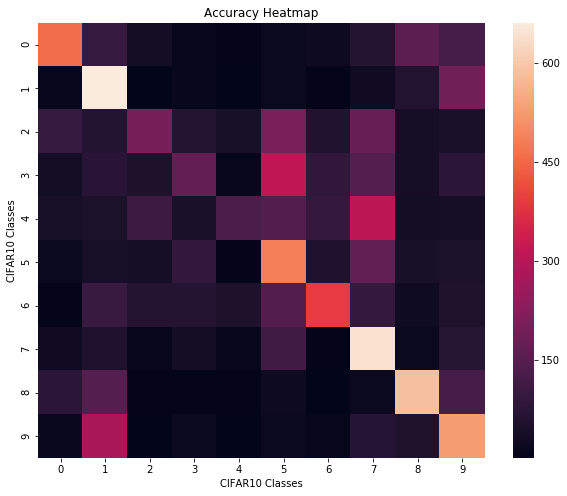

In [98]:
display_classification_results(testLabels, bestModelPreds, title="Accuracy Heatmap",show_report=True)

In [161]:
def visualizePreds(y_test, y_pred, test_dataset, labelNames, visualizeCorrect=False):
    
    correct = np.array(y_test) == np.array(y_pred)
    pos = []
    posPredLabel = []
    posTrueLabel = []
    
    if visualizeCorrect:
        while len(pos) <= 10:
            i = random.randint(0, len(y_pred))
            if y_test[i] == y_pred[i]:

                
                pos.append(i)
                posPredLabel.append(y_pred[i])
                posTrueLabel.append(y_test[i])

    else:
        while len(pos) <= 10:
            i = random.randint(0, len(y_pred))
            if y_test[i] != y_pred[i]:
                pos.append(i)
                posPredLabel.append(y_pred[i])
                posTrueLabel.append(y_test[i])
                
    
    fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,16))

    i = 0
    for row in ax:
        for col in row:
            img = test_dataset[pos[i]][0]
            img = np.rollaxis(np.array(img),0,3)
            col.imshow(toimage(img))
            col.set_title('True Label: '+str(y_test[pos[i]])+' '+labelNames[y_test[pos[i]]]+'\n Pred Label: '+str(y_pred[pos[i]])+' '+labelNames[y_pred[pos[i]]])
            col.set_xticks([])
            col.set_yticks([])
            i += 1
            
    plt.tight_layout()
    plt.show()

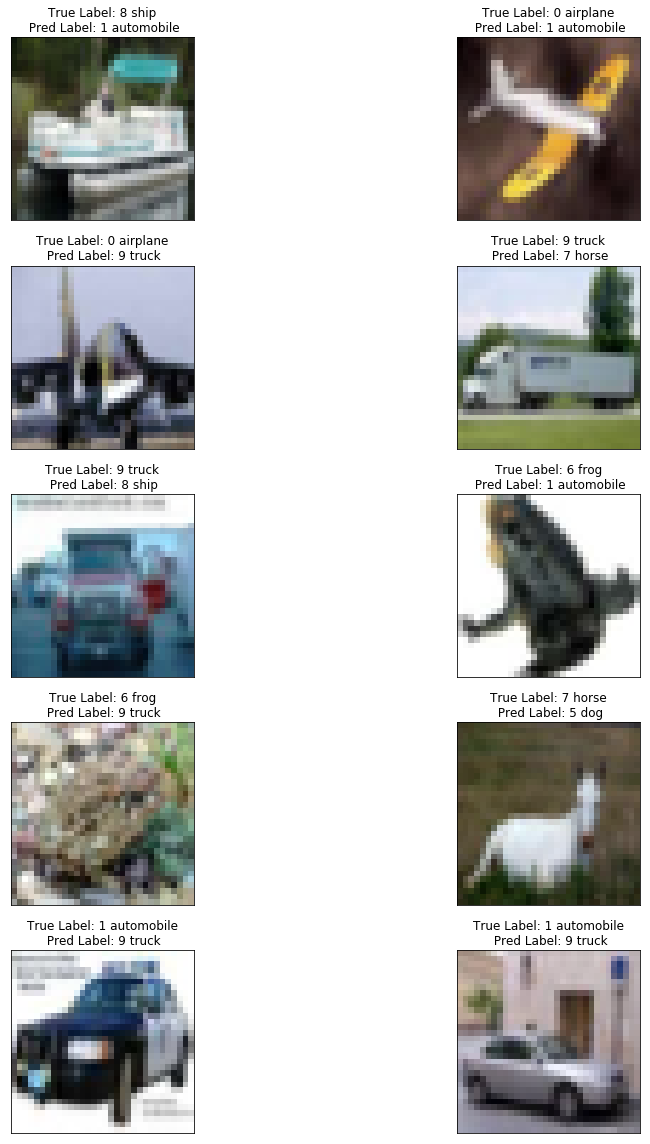

In [163]:
# Visualizing incorrect predictions
visualizePreds(testLabels, bestModelPreds,test_dataset, labelNames)

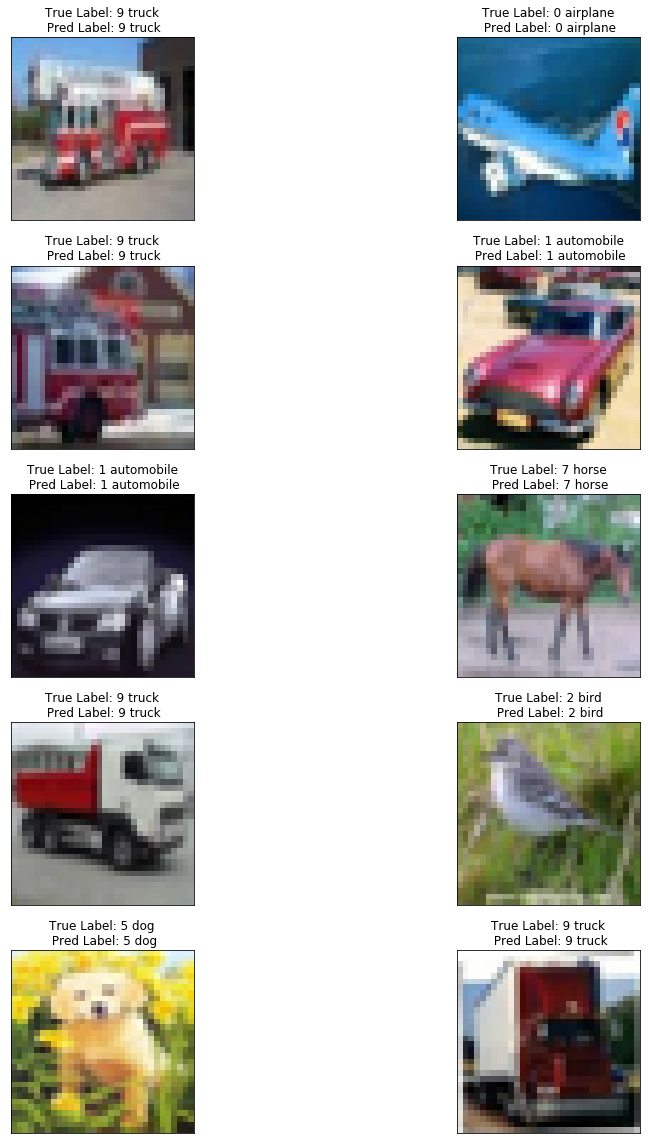

In [164]:
# Visualizing correct predictions
visualizePreds(testLabels, bestModelPreds, test_dataset, labelNames, True)